In [19]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set the path to your .txt statistics file from juicer output
MY_STATS_FILE = 'rep1_inter_30.txt'

In [129]:
data = pd.read_csv(MY_STATS_FILE, sep=":", header=0, names=['category', 'num'])

In [134]:
print(data)

                              category        num
0                 Sequenced Read Pairs  137318874
1                        Normal Paired  116488795
2                      Chimeric Paired   12161336
3                   Chimeric Ambiguous    3463185
4                             Unmapped    5205558
5               Ligation Motif Present   55192753
6   Alignable (Normal+Chimeric Paired)  128650131
7                         Unique Reads  117249732
8                       PCR Duplicates   11371008
9                   Optical Duplicates      29391
11                Intra-fragment Reads    2052068
12                Below MAPQ Threshold   42748936
13                       Hi-C Contacts   72448728
14              Ligation Motif Present   25885184
17                   Inter-chromosomal   29899985
18                   Intra-chromosomal   42548743
19                 Short Range (<20Kb)   18797918
20                  Long Range (>20Kb)   23750029


In [131]:
# Format to only return the actual number of reads per category
data['num'] = data['num'].str.replace(',', '')
data['num'] = data['num'].str.strip()
data['num'] = data['num'].str.split()
data['num'] = data['num'].str[0]

In [132]:
# Format category names and drop rows that do not contain numbers of reads
data['category'] = data['category'].str.strip()
data = data.drop([10, 15, 16])

In [133]:
# Change the datatype to integer
data['num'] = data['num'].astype('int')

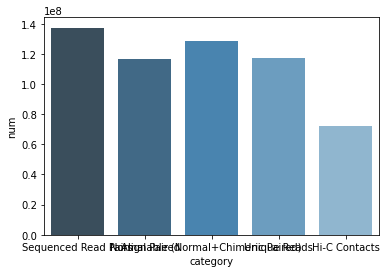

In [141]:
ax = sns.barplot(x="category", y="num", data=data.iloc[[0, 1, 6, 7, 12]],
                palette="Blues_d")